In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-12-03 20:01:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  80.5KB/s    in 0.4s    

2019-12-03 20:02:00 (80.5 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [6]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")

In [7]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
cust_df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [10]:
df = cust_df.drop('Address',axis=1)

In [11]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
X= df.values[:,1:]
X=np.nan_to_num(X)
Clus_dataSet=StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [15]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

In [16]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [17]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


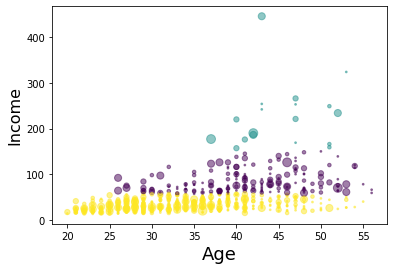

In [18]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


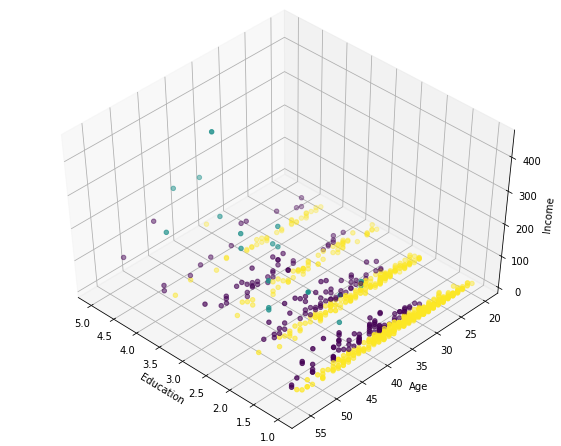

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
